### Answer 1
Let $C = AB$, where $A$, $B$ and $C$ have shapes $(n, k)$, $(k,m)$ and $(n,m)$ respectively. Then the $(i, j)^{th}$ element of $c$ is given by the dot product of the $i^{th}$ row of A with the $j^{th}$ column of $B$ 

$$ c_{i,j} = \sum_{l=1}^{k} A_{i,l}B_{l,j}$$

$C$ has $n \times m$ elements in total. Computing each element requires $k$ multiplications and $k-1$ additions. So, 
* The number of multiplications required is $n\times m\times k$
* The number of additions required is $n\times m \times (k-1)$

The total number of operations required is $\mathcal{O}(mnk)$.

### Answer 2

A python code that multiplies the above two matrices given in the list of lists format is shown below.

In [1]:
def matmul_lol(A, B):
    n = len(A)
    k = len(B)
    # for i in range(n):
    #     if len(A[i]) != k:
    #         raise ValueError("A is inconsistent for multiplication with B!")
    #         return None
    m = len(B[0])
    # for i in range(1, k):
    #     if len(B[i]) != m:
    #         raise ValueError("B has rows of unequal size!")
    #         return None
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C

I will multiply random matrices created using the `np.random.randint` function, after fixing the parameters $n,k$ and $m$ to some reasonable values.

In [2]:
n = 100
k = 100
m = 100

import numpy as np

A = np.random.randint(0,10,(n,k))
B = np.random.randint(0,10,(k,m))

A_lol = [[int(elem) for elem in row] for row in A]
B_lol = [[int(elem) for elem in row] for row in B]

%timeit -n 100 C = A@B
%timeit -n 100 C_lol = matmul_lol(A_lol, B_lol)

1.08 ms ± 99.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
113 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Numpy is about $200\times$ faster than naive Python implementation.

### Answer 3

When $n$ is odd, the median is the $⌈n/2⌉^{th}$ largest element in an $n$-element array. Otherwise it's the mean of the middle two elements.

Successively finding the next largest element till we reach the median will require $\mathcal{O}(n^2)$ units of time. This is because finding the $k^{th}$ largest element will require $k$ passes over the array, each requiring $n$ comparisons for a time complexity of $\mathcal{O}(nk)$. Setting $k = ⌈n/2⌉$, we get $\mathcal{O}(n^2)$

The code for this approach is given below.

In [3]:
def median_naive(A):
    n = len(A)
    if n%2 == 1:
        k = n//2 + 1
        d = [0]*n # keeps track of what is done
        for i in range(k):
            m = d.index(0)
            for j in range(n):
                if d[j] == 1:
                    continue
                if A[j] > A[m]:
                    m = j
            d[m] = 1
        return A[m]
    else:
        k = n//2 + 1
        d = [0]*n # keeps track of what is done
        for i in range(1, k+1):
            m = d.index(0)
            for j in range(n):
                if d[j] == 1:
                    continue
                if A[j] > A[m]:
                    m = j
            d[m] = 1
            if i == k-1:
                m_prev = m
        return (A[m] + A[m_prev])/2

A better approach would be to use Python's built-in sorting function `sorted` which runs in worst-case $\mathcal{O}(n\log(n))$ time.

In [4]:
def median_better(A):
    n = len(A)
    A_sorted = sorted(A)
    if n%2 == 1:
        return A_sorted[n//2]
    else:
        return (A_sorted[n//2] + A_sorted[n//2 - 1])/2

Comparing both against `np.median`, we see that it is about $10 \times$ faster than the sorting approach and $3000\times$ faster than the naive approach.

In [5]:
A = np.random.randint(-100, 100, 1000)

%timeit -n 100 np.median(A)
%timeit -n 100 median_better(A)
%timeit -n 100 median_naive(A)

21.4 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
162 µs ± 9.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
75.6 ms ± 686 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Answer 4

Let $f(x, y) = x^2y+y^3\sin(x)$. Then the gradient of $f$ is given by $$\overrightarrow{\nabla}f = \begin{bmatrix} \dfrac{\partial f}{\partial x} \\ \dfrac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2xy + y^3 \cos(x) \\ x^2 + 3y^2\sin(x)\end{bmatrix} = (2xy + y^3 \cos(x))\hat{\textbf{i}} + (x^2 + 3y^2\sin(x))\hat{\textbf{j}}$$ where $\hat{\textbf{i}} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\hat{\textbf{j}} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

### Answer 5

Using `JAX` to check the gradient. We see that the values agree upto at most 6 decimal places.

In [1]:
from jax import grad
import jax.numpy as jnp
import numpy as np

def f(x):
    return x[0]**2 * x[1] + x[1]**3 * jnp.sin(x[0])

def grad_f(x):
    return [2*x[0]*x[1] + x[1]**3*np.cos(x[0]), x[0]**2 + 3*x[1]**2*np.sin(x[0])]

jax_grad_f = grad(f)

for _ in range(10):
    x = np.random.uniform(0, 10, 2)
    print("x = {:.5f} y = {:.5f}".format(x[0], x[1]))
    devarr = jax_grad_f(x)
    jax_list = [float(y) for y in devarr]
    print("Analytical \t", grad_f(x))
    print("JAX \t\t", jax_list, end='\n\n')

x = 2.51819 y = 7.57667
Analytical 	 [-314.9708802912677, 106.88246070700524]
JAX 		 [-314.97088623046875, 106.8824462890625]

x = 7.77362 y = 8.44658
Analytical 	 [179.6982612594731, 273.7723648422972]
JAX 		 [179.69815063476562, 273.7723693847656]

x = 2.51592 y = 5.29283
Analytical 	 [-93.55378718900305, 55.54842135131192]
JAX 		 [-93.55377197265625, 55.54841613769531]

x = 2.11358 y = 4.24716
Analytical 	 [-21.618247568090062, 50.804679953926794]
JAX 		 [-21.618240356445312, 50.8046760559082]

x = 9.24593 y = 9.26794
Analytical 	 [-611.9868349711265, 131.3289260740692]
JAX 		 [-611.9867553710938, 131.32891845703125]

x = 6.21470 y = 0.49157
Analytical 	 [6.228379669331018, 38.572912812630456]
JAX 		 [6.228379726409912, 38.57291030883789]

x = 3.37961 y = 3.23079
Analytical 	 [-10.934563059639046, 4.038649673710025]
JAX 		 [-10.934568405151367, 4.03864860534668]

x = 1.08894 y = 4.70294
Analytical 	 [58.44735957381668, 59.98337685815774]
JAX 		 [58.447364807128906, 59.98338317871094

### Answer 6

Defining `x` and `y` to be symbols and then evaluating gradient using the formula involving parital derivatives.

In [2]:
from sympy import symbols, sin, diff, Matrix

x, y = symbols('x y')
f = x**2 * y + y**3 * sin(x)
grad_f = Matrix([[diff(f, x)], [diff(f, y)]])
grad_f

Matrix([
[ 2*x*y + y**3*cos(x)],
[x**2 + 3*y**2*sin(x)]])

Using `sympy.vector.gradient` to directly evaluate the gradient of $f$.

In [3]:
from sympy.vector import CoordSys3D, gradient

R = CoordSys3D('R')
f = R.x**2 * R.y + R.y**3 * sin(R.x)
gradient(f)

(2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j

### Answer 7

There are 4 years, 2022 to 2025. Each year has 2 branches, STEM and Arts. Each branch has 5 students for which we are storing their Roll No., Name and Marks in 3 subjects. Below are some helper functions.

In [4]:
try:
    f = open('first-names.txt', 'r')
    first_names = f.readlines()
    first_names = [name[:-1] for name in first_names]
    f.close()

    f = open('last-names.txt', 'r')
    last_names = f.readlines()
    last_names = [name[:-1] for name in last_names]
    f.close()

    def randname():
        return np.random.choice(first_names) + ' ' + np.random.choice(last_names)

except:
    def randname():
        return ''.join(list(map(chr, np.random.randint(97,123,np.random.randint(5, 10)))))



def get_rollNo(year, branch, id):
    return int(str(year)[-2:] + str(branch) + '0'*(4-len(list(str(id)))) + str(id))

Generating the nested dictionary using nested loops, using random names and random marks.

In [5]:
n_students = 10
n_years = 4

years = list(range(2022, 2022 + n_years))
branches = ['STEM', 'Arts']
subjects = [['Maths', 'Physics', 'English'], ['History', 'Society', 'Literature']]

D = {}
for year in years:
    year_dict = {}
    for i, branch in enumerate(branches):
        names_dict = {}
        for j in range(n_students):
            marks = list(map(int, np.random.normal(60, 15, 3)))
            marks_dict = {}
            for k, mark in enumerate(marks):
                marks_dict[subjects[i][k]] = marks[k]
            names_dict.update({j+1:{'Marks':marks_dict, 'Roll Number':get_rollNo(year, i+1, j+1), 'Name':randname()}})
        year_dict.update({branch:names_dict})
    D.update({year:year_dict})

In [6]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(D)

{   2022: {   'Arts': {   1: {   'Marks': {   'History': 68,
                                              'Literature': 70,
                                              'Society': 54},
                                 'Name': 'Hyacinthe Allen',
                                 'Roll Number': 2220001},
                          2: {   'Marks': {   'History': 51,
                                              'Literature': 31,
                                              'Society': 45},
                                 'Name': 'Sula Anderson',
                                 'Roll Number': 2220002},
                          3: {   'Marks': {   'History': 50,
                                              'Literature': 82,
                                              'Society': 65},
                                 'Name': 'Ashly Martinez',
                                 'Roll Number': 2220003},
                          4: {   'Marks': {   'History': 83,
                           

### Answer 8

Using classes to store the same information. Year objects have an attribute `branches` that stores the list of branches. Branch objects have a `students` attribute that stores list of students. A Student object has various attributes as shown below.

In [7]:
class Year:
    def __init__(self, branches):
        self.branches = branches

class Branch:
    def __init__(self, students, name):
        self.students = students
        self.name = name

class Student:
    def __init__(self, name, rollNo, marks, branch, year):
        self.name = name
        self.rollNo = rollNo
        self.marks = marks
        self.branch = branch
        self.year = year

Creating a database which is a list of year objects.

In [8]:
database = []
for key1, val1 in D.items():
    # key1 is year
    b_lst = []
    for key2, val2 in val1.items():
        # key2 is Branch name
        s_lst = []
        for key3, val3 in val2.items():
            # key3 is sl_no
            s_lst.append(Student(val3['Name'], val3['Roll Number'], val3['Marks'], key2, key1))
        b_lst.append(Branch(s_lst, key2))
    database.append(Year(b_lst))

Printing the data in the database.

In [9]:
for year in database:
    for branch in year.branches:
        for student in branch.students:
            print('Name: \t', student.name)
            print(f'Roll No.:{student.rollNo}')
            print('Branch: ', student.branch)
            print('Marks: \t', student.marks)
            print('Year: \t', student.year, end='\n\n')

Name: 	 Janie Thompson
Roll No.:2210001
Branch:  STEM
Marks: 	 {'Maths': 75, 'Physics': 62, 'English': 31}
Year: 	 2022

Name: 	 Perry Harris
Roll No.:2210002
Branch:  STEM
Marks: 	 {'Maths': 30, 'Physics': 78, 'English': 48}
Year: 	 2022

Name: 	 Melany Rivera
Roll No.:2210003
Branch:  STEM
Marks: 	 {'Maths': 66, 'Physics': 68, 'English': 47}
Year: 	 2022

Name: 	 Theodosia Carter
Roll No.:2210004
Branch:  STEM
Marks: 	 {'Maths': 66, 'Physics': 42, 'English': 83}
Year: 	 2022

Name: 	 Kania Garcia
Roll No.:2210005
Branch:  STEM
Marks: 	 {'Maths': 77, 'Physics': 64, 'English': 56}
Year: 	 2022

Name: 	 Laurel Smith
Roll No.:2210006
Branch:  STEM
Marks: 	 {'Maths': 88, 'Physics': 62, 'English': 45}
Year: 	 2022

Name: 	 Corey Harris
Roll No.:2210007
Branch:  STEM
Marks: 	 {'Maths': 67, 'Physics': 64, 'English': 53}
Year: 	 2022

Name: 	 Rosa Smith
Roll No.:2210008
Branch:  STEM
Marks: 	 {'Maths': 75, 'Physics': 72, 'English': 76}
Year: 	 2022

Name: 	 Chris Miller
Roll No.:2210009
Branc

### Answer 9

The plots are shown below.

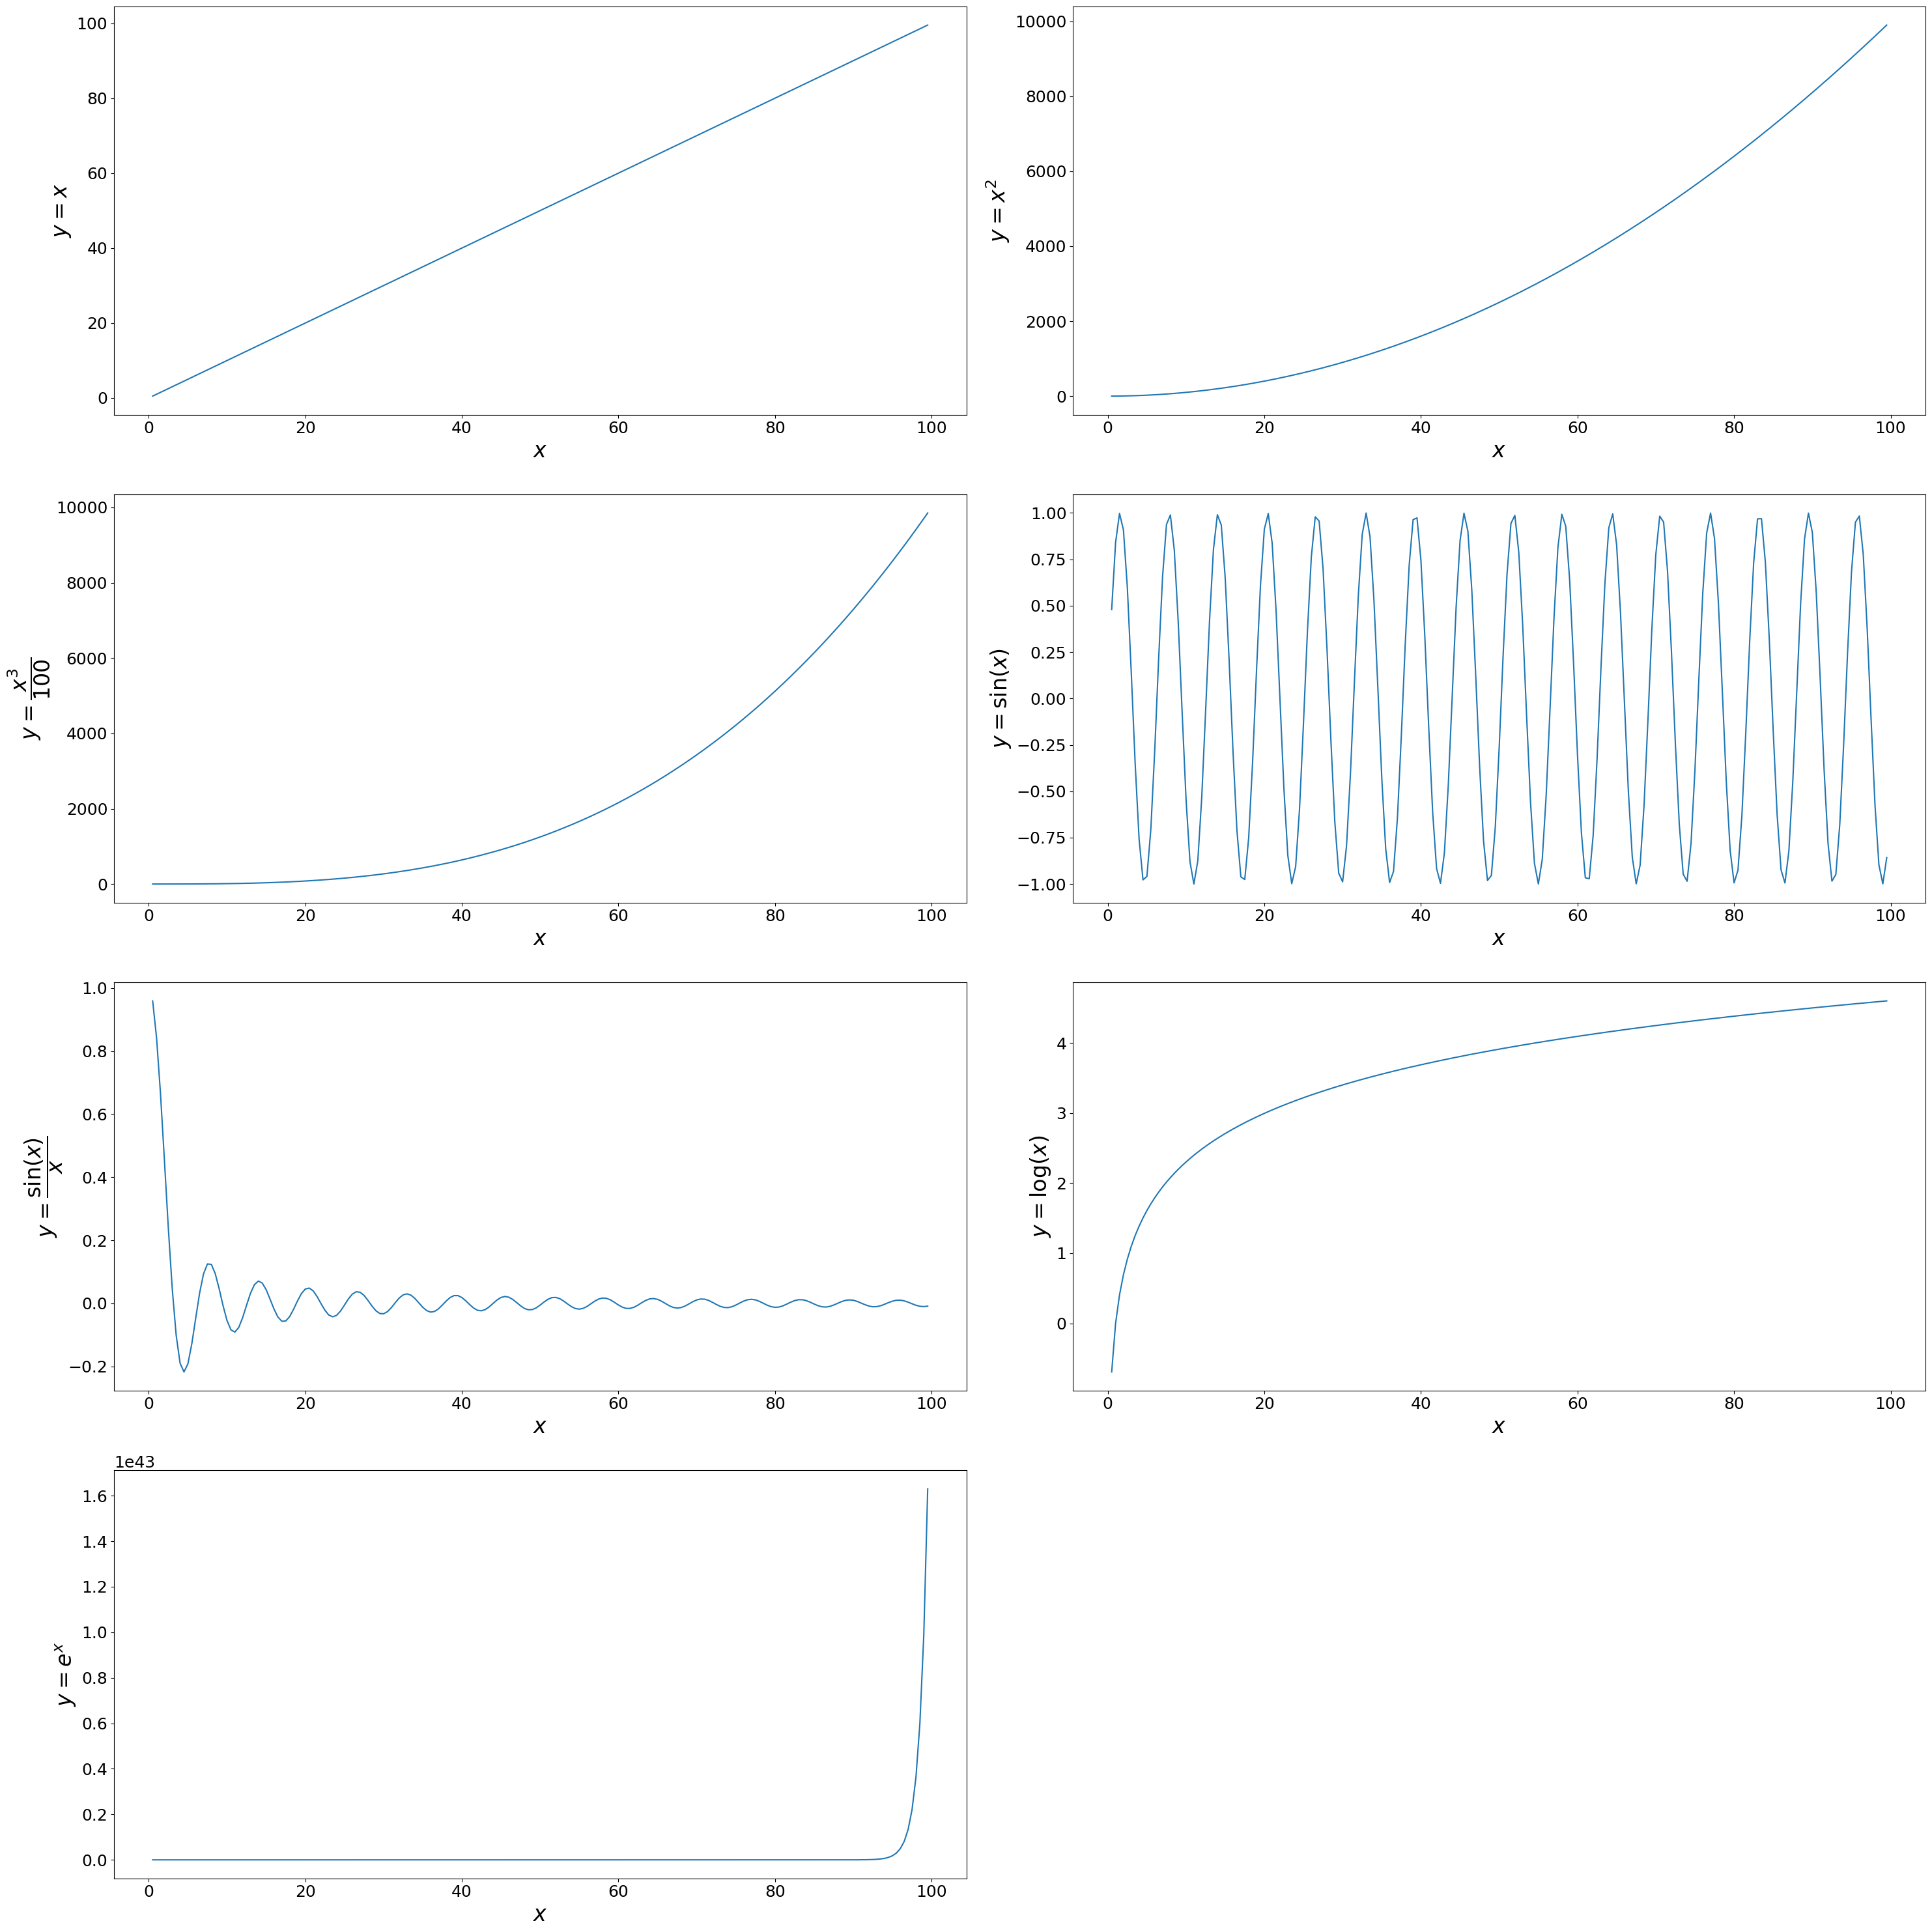

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams.update({'font.size': 18})

x = np.arange(0.5, 100, 0.5)

ylabels = [r'$y = x$', r'$y = x^2$', r'$y = \dfrac{x^3}{100}$', r'$y = \sin(x)$', r'$y = \dfrac{\sin(x)}{x}$', r'$y = \log(x)$', r'$y = e^x$']
ys = [x, x**2, x**3/100, np.sin(x), np.sin(x)/x, np.log(x), np.exp(x)]

for i in range(7):
    plt.subplot(4, 2, i+1)
    plt.xlabel(r'$x$', fontsize=24)
    plt.ylabel(ylabels[i], fontsize=24)
    y = ys[i]
    plt.plot(x, y)

plt.tight_layout()
plt.show()

### Answer 10

Using `numpy` and `pandas` as instructed to create the dataframe.

In [16]:
import pandas as pd

X = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(X, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,1.767348,1.277147,1.542009,1.627667,1.199746
1,1.760754,1.836151,1.112620,1.825114,1.692182
2,1.876210,1.437970,1.673533,1.556260,1.239259
3,1.021911,1.131281,1.637174,1.329583,1.980253
4,1.190821,1.095515,1.045632,1.188657,1.094742
5,1.043304,1.095803,1.794303,1.881403,1.116793
6,1.301217,1.787088,1.595969,1.617029,1.715832
7,1.593462,1.742972,1.939717,1.523229,1.170011
8,1.848309,1.207522,1.318056,1.680624,1.524873
9,1.894168,1.892013,1.049655,1.128560,1.062107


Finding the column with max standard deviation is done using the method `var` which produces a `pandas.core.series.Series` object containing the variance of all the columns. Then, we use `np.argmax` to find which column has the maximum standard deviation. Similarly, the row with the lowest mean can be found by first taking the transpose of the dataframe and then using the method `mean` which gives the mean of all the rows of the original dataframe. Then, we use `np.argmin`.

In [18]:
stdev_of_cols = np.sqrt(df.var()) # pandas series
print(stdev_of_cols.__class__, end='\n\n')

print("Standard Deviation of columns")
print(stdev_of_cols, end='\n\n')

print("Column with max standard deviation is", df.columns[np.argmax(stdev_of_cols)])

<class 'pandas.core.series.Series'>

Standard Deviation of columns
a    0.330576
b    0.258624
c    0.293043
d    0.261441
e    0.305301
dtype: float64

Column with max standard deviation is a


Accessing rows by taking transpose, then accessing columns.

In [19]:
df_T = df.T
df_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
a,1.767348,1.760754,1.876210,1.021911,1.190821,1.043304,1.301217,1.593462,1.848309,1.894168,1.752922,1.346373,1.811232,1.741630,1.965361,1.527758,1.775146,1.001720,1.082874,1.661104
b,1.277147,1.836151,1.437970,1.131281,1.095515,1.095803,1.787088,1.742972,1.207522,1.892013,1.235037,1.495712,1.202776,1.522379,1.533340,1.247437,1.068369,1.405973,1.423058,1.263369
c,1.542009,1.112620,1.673533,1.637174,1.045632,1.794303,1.595969,1.939717,1.318056,1.049655,1.427089,1.514877,1.788586,1.748871,1.982800,1.752009,1.382196,1.136264,1.737807,1.257598
d,1.627667,1.825114,1.556260,1.329583,1.188657,1.881403,1.617029,1.523229,1.680624,1.128560,1.591574,1.453193,1.663087,1.844678,1.169846,1.918688,1.872776,1.699858,1.186124,1.861485
e,1.199746,1.692182,1.239259,1.980253,1.094742,1.116793,1.715832,1.170011,1.524873,1.062107,1.653882,1.438491,1.997795,1.038130,1.339821,1.051883,1.532984,1.320699,1.744869,1.521210


In [20]:
mean_of_rows = df_T.mean()
print("Mean of rows of df (columns of df_T)")
print(mean_of_rows, end='\n\n')

print("Row with lowest mean is ", np.argmin(mean_of_rows))

Mean of rows of df (columns of df_T)
0     1.482783
1     1.645364
2     1.556646
3     1.420040
4     1.123074
5     1.386321
6     1.603427
7     1.593878
8     1.515877
9     1.405300
10    1.532101
11    1.449729
12    1.692695
13    1.579137
14    1.598234
15    1.499555
16    1.526294
17    1.312903
18    1.434946
19    1.512953
dtype: float64

Row with lowest mean is  4


### Answer 11

Adding new column `f` which is the sum of all the column values for that row, and empty column `g`.

In [21]:
df['f'] = df_T.sum()
df['g'] = ''
df

,a,b,c,d,e,f,g
0,1.767348,1.277147,1.542009,1.627667,1.199746,7.413917,
1,1.760754,1.836151,1.112620,1.825114,1.692182,8.226822,
2,1.876210,1.437970,1.673533,1.556260,1.239259,7.783231,
3,1.021911,1.131281,1.637174,1.329583,1.980253,7.100202,
4,1.190821,1.095515,1.045632,1.188657,1.094742,5.615368,
5,1.043304,1.095803,1.794303,1.881403,1.116793,6.931606,
6,1.301217,1.787088,1.595969,1.617029,1.715832,8.017135,
7,1.593462,1.742972,1.939717,1.523229,1.170011,7.969391,
8,1.848309,1.207522,1.318056,1.680624,1.524873,7.579384,
9,1.894168,1.892013,1.049655,1.128560,1.062107,7.026502,


Using `df.loc` to select those rows that satisfy the given condition, further filtering to select only the `g` column.

In [22]:
df.loc[df['f'] < 8, ['g']] = 'LT8'
df.loc[df['f'] >= 8, ['g']] = 'GT8'
df

,a,b,c,d,e,f,g
0,1.767348,1.277147,1.542009,1.627667,1.199746,7.413917,LT8
1,1.760754,1.836151,1.112620,1.825114,1.692182,8.226822,GT8
2,1.876210,1.437970,1.673533,1.556260,1.239259,7.783231,LT8
3,1.021911,1.131281,1.637174,1.329583,1.980253,7.100202,LT8
4,1.190821,1.095515,1.045632,1.188657,1.094742,5.615368,LT8
5,1.043304,1.095803,1.794303,1.881403,1.116793,6.931606,LT8
6,1.301217,1.787088,1.595969,1.617029,1.715832,8.017135,GT8
7,1.593462,1.742972,1.939717,1.523229,1.170011,7.969391,LT8
8,1.848309,1.207522,1.318056,1.680624,1.524873,7.579384,LT8
9,1.894168,1.892013,1.049655,1.128560,1.062107,7.026502,LT8


The number of rows in the dataframe where the value in the column `g` is `'LT8'` can be found using

In [23]:
df.loc[df['g'] == 'LT8'].shape[0]

17

The standard deviation of the column `f` for the rows where the value in the column `g` is `'LT8'` and `'GT8'` is  

In [24]:
print("for 'LT8' ", float(np.sqrt(df.loc[df['g'] == 'LT8', ['f']].var())))
print("for 'GT8' ", float(np.sqrt(df.loc[df['g'] == 'GT8', ['f']].var())))

for 'LT8'  0.5907731139544694
for 'GT8'  0.22330627116918572


### Answer 12

When the shapes of two `np.ndarray` is not the same, but it is possible to extend one to fit the shape of the other by simply extending the n-D array in some dimension in a trivial manner, this is called **Broadcasting**. For example, consider a matrix $A$ of shape `(3,4)` and a column vector $b$ of shape `(3,1)`.

In [25]:
A = np.random.randint(-10, 10, (3, 4))
b = np.random.randint(-10, 10, (3, 1))
print(A)
print("A.shape =", A.shape, end='\n\n')
print(b)
print("b.shape =", b.shape)

[[  1   9   1  -9]
 [ -2  -4  -5 -10]
 [  8  -8  -6  -1]]
A.shape = (3, 4)

[[ 0]
 [-8]
 [-4]]
b.shape = (3, 1)


Adding them is not directly possible but there is an obvious way in which the $b$ vector can be extended to fit the shape of the matrix; just duplicate the column three more times to get a matrix. Let's call it $B$. `numpy` implicity does this when adding them together. However, we can explicitly do this using the function `np.broadcast_to` that allows us to broadcast

In [26]:
B = np.broadcast_to(b, A.shape)
print('B')
print(B)
print('A + b')
print(A + b)
print('Is A + b == A + B ?', np.all(A + b == A + B))

B
[[ 0  0  0  0]
 [-8 -8 -8 -8]
 [-4 -4 -4 -4]]
A + b
[[  1   9   1  -9]
 [-10 -12 -13 -18]
 [  4 -12 -10  -5]]
Is A + b == A + B ? True


If $b$ were a 1-D array, numpy will throw an error as it will not implicity add another dimension.

In [27]:
b = np.random.randint(-10, 10, (3, ))
try:
    A + b
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,4) (3,) 


As another example, consider a vector $b$ that has shape `(3, 1, 1)` and a 3-D array $A$ of shape `(3, 2, 4)`

In [28]:
A = np.random.randint(-10, 10, (3, 2, 4))
b = np.random.randint(-10, 10, (3, 1, 1))
print(A)
print(b)

[[[ -4   6  -4   7]
  [ -6  -6  -6  -7]]

 [[ -5  -5   3   1]
  [  0  -2  -6  -3]]

 [[-10  -8 -10   3]
  [ -9  -9  -8  -4]]]
[[[-1]]

 [[ 7]]

 [[-9]]]


In [29]:
A + b

array([[[ -5,   5,  -5,   6],
        [ -7,  -7,  -7,  -8]],

       [[  2,   2,  10,   8],
        [  7,   5,   1,   4]],

       [[-19, -17, -19,  -6],
        [-18, -18, -17, -13]]])

It is clear what numpy does, it broadcasts $b$ to the shape of $A$ in the most natural way.

In [31]:
np.broadcast_to(b, A.shape)

array([[[-1, -1, -1, -1],
        [-1, -1, -1, -1]],

       [[ 7,  7,  7,  7],
        [ 7,  7,  7,  7]],

       [[-9, -9, -9, -9],
        [-9, -9, -9, -9]]])

Let us look at an example where numpy fails to do the broadcasting.

In [32]:
A = np.random.randint(-10, 10, (2, 3, 4))
b = np.random.randint(-10, 10, (3, 1, 1))
print(A)
print(b)

[[[  9  -3  -3   4]
  [ -4 -10  -9   4]
  [ -3   2  -6   8]]

 [[ -7  -6  -4  -2]
  [ -5   2  -8   5]
  [  8   8  -2   8]]]
[[[5]]

 [[1]]

 [[3]]]


In [33]:
try:
    A + b
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,3,4) (3,1,1) 


Thus, numpy implicitly broadcasts arrays when all their dimensions are compatible, either they are equal or one of them is 1. In this case, 2 and 3 are not compatible.

### Answer 13

Implementing the default behavior of `np.argmin` that returns the linear index into a nD-array.

In [34]:
def my_argmin(z):
    ''' z is a numpy array '''
    z_flat = list(z.flatten())
    return z_flat.index(min(z_flat))

In [35]:
Z = np.random.randint(-100, 100, (5, 5))
my_argmin(Z) == np.argmin(Z)

True